# Multi-Class and Imbalanced Class Machine Learning

<b> Goals: </b>

- Finish the rest of the advanced Sklearn tools lesson by learning about imputation and one hot encoding.
- Work on a supervised classification dataset with more than two classes, specifically the famous MNIST digits dataset.
- Work on a supervised classification dataset with imbalanced classes, specifically the credit card fraud dataset.

## Advanced Sklearn tools (cont.)

In [2]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.metrics import recall_score, roc_auc_score, roc_curve, accuracy_score
from sklearn.preprocessing import Imputer, OneHotEncoder, LabelEncoder, LabelBinarizer;

/Users/darrenklee/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
#Load in titanic data

path = "../data/titanic.csv"

titanic = pd.read_csv(path)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Encoding aka dummy variables with sklearn

**One hot encoding:*** Transforming categorical variables 

In [5]:
#Assign X and y

X = titanic.drop("Survived", axis = 1)
y = titanic.Survived

In [6]:
#Make a train test split with the titanic data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 8)

In [7]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We're going to use LabelEncoder to turn the object values into numbers. Instead turning each unique value into a column a la dummy variables, this tool returns a single column and replaces the objects/strings with a number.

In [12]:
#Intialize LabelEncoder object

le = LabelEncoder()

#Use le on the sex column
sex_encoded = le.fit_transform(X_train.Sex)

sex_encoded[:10]

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0])

In [13]:
titanic.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

Turns male and female into a 1s and 0s.

The advantage of using this is that we can use the LabelEncoder object (le) to transform other data.

In [14]:
#Pass in the Sex column on the testing dataset into the le object

le.transform([["male"], ["female"], ["unknown"]])

/Users/darrenklee/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: y contains new labels: ['unknown']

Now let's try this on the Embarked column

In [17]:

#Intialize LabelEncoder
le = LabelEncoder()

#Pass Embarked column into le object
emb_encoded = le.fit_transform(X_train.Embarked)

#Look at first twenty rows
emb_encoded[:20]

array([3, 4, 4, 2, 2, 4, 4, 2, 4, 4, 3, 4, 2, 4, 4, 4, 4, 4, 3, 4])

In [18]:
# Call .classes_ to see the original object values
le.classes_

array([nan, nan, 'C', 'Q', 'S'], dtype=object)

In [19]:
#Transform the embarked class of the testing dataset
le.transform(X_test.Embarked)[:20]


array([4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 4])

In [20]:
#Look at original X_test.Embarked
X_test.Embarked.iloc[:10]

350    S
176    S
723    S
404    S
306    C
665    S
607    S
151    S
265    S
865    S
Name: Embarked, dtype: object

How to use the OneHotEncoder object

In [21]:
#Intialize object
onehot = OneHotEncoder()

#Fit and transform using the emb_encoded variable. DON'T FORGET RESHAPE for this step..
emb_onehot = onehot.fit_transform(emb_encoded.reshape(-1, 1))

#Look at emb_onehot
emb_onehot.toarray()

array([[ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.],
       ..., 
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.]])

In [19]:
#Transform emb_encoded_test using onehot object

emb_encoded_test = le.transform(X_test.Embarked)

onehot.transform(emb_encoded_test.reshape(-1, 1)).toarray()

array([[ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.],
       ..., 
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.]])

We can also use the LabelBinarizer to do this as well

In [20]:

#Intialize LabelBinarizer

lb = LabelBinarizer()

#Fit and transform on the Embarked column of the training dataset

#Fill nans with unknown
binarized_data = lb.fit_transform(X_train.Embarked.fillna("unknown"))

binarized_data[:10]

array([[0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0]])

In [21]:
#Look at the class or column values
lb.classes_

array(['C', 'Q', 'S', 'unknown'],
      dtype='|S7')

In [21]:
#Transform the testing data using lb
lb.transform(X_test.Embarked.fillna("unknown"))

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       ..., 
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0]])

You may be asking yourself "Why use this instead of pd.get_dummies?"

That's because testing data or any other new you want to use may not have the same values in their categorical columns.

In [22]:
#Create new dataset from X_test where there is no C value in the Embarked column
X_test2 = X_test[X_test.Embarked != "C"]


#Transform the Embarked column from  X_test2 using the LabelBinarizer

lb.transform(X_test2.Embarked.fillna("unknown"))

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0,

This returns a 0 for every value under the C column. Using pd.get_dummies we would have three columns instead of four. This is important because when you fit you model using the training data and then make predictions using the testing data, the model won't work if your testing and training data don't have the same number of columns.

In conclusion:

![e](https://chrisalbon.com/machine-learning/one-hot_encode_nominal_categorical_features/One-Hot_Encoding_print.png)

### Imputation

Like the previous topic, imputation is something we've done using pandas but in this lesson we'll be using sklearn to do some.

**Imputation** Replacing nan or null values with the mean or median values of a specific column in a dataset.

In [24]:
#Intialize Imputer object and set axis = 1

imp = Imputer(axis=1)


In [25]:
#Fit imp on Age column of training data

imp.fit(X_train.Age)

Imputer(axis=1, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [26]:
#Whats the average of X_train.Age?

X_train.Age.mean()

30.367322175732216

In [30]:
#Transform X_train.Age using imp

age_imp = imp.transform(X_train.Age.reshape(1, -1))

#view age_imp
age_imp[0][:20]

/Users/darrenklee/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


array([ 40.        ,  48.        ,  42.        ,  35.        ,
        30.36732218,  36.5       ,  54.        ,  17.        ,
        31.        ,  30.36732218,  70.5       ,  29.        ,
        30.36732218,  16.        ,  43.        ,  36.        ,
        32.        ,  32.        ,  30.36732218,  30.        ])

Transformation time

In [31]:
#Whats the average age in X_test
X_test.Age.mean()

28.345720338983053

In [33]:

#Tranform the Age column of testing dataset with the imp object

age_test_imp = imp.transform(X_test.Age.reshape(1, -1))

age_test_imp[0][:20]

/Users/darrenklee/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


array([ 23.        ,  28.34572034,  50.        ,  20.        ,
        28.34572034,  32.        ,  27.        ,  22.        ,
        36.        ,  42.        ,  21.        ,   0.83      ,
        28.        ,  40.        ,  28.34572034,  25.        ,
        20.        ,  28.34572034,   9.        ,  32.        ])

We can also use the median instead of age

In [34]:
#Intialize imputer object with strategy set to median
imp_med = Imputer(axis=1, strategy="median")
#Fit
imp_med.fit(X_train.Age)
#Whats the median age of Age?
X_train.Age.median()

29.0

In [35]:
#Median age of X_test
X_test.Age.median()

27.5

In [ ]:
#Transform the Age column of the testing dataset
imp_med.transform(X_test.Age)[0][:30]

We can also use the mode as an imputation strategy

In [36]:
#Intialize imputation object and set strategy to most frequence

imp_cat = Imputer(axis =1 , strategy="most_frequent")


#Fit imp_cat on Age column

imp_cat.fit(X_train.Age)

Imputer(axis=1, copy=True, missing_values='NaN', strategy='most_frequent',
    verbose=0)

In [37]:
#Whats the most frequent age?
X_train.Age.value_counts().max()

21

In [42]:
#Tranform 

imp_cat.transform(X_train.Age.reshape(1, -1))[0][100:200]

/Users/darrenklee/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


array([ 35.  ,  16.  ,  35.  ,  18.  ,  18.  ,   0.83,  18.  ,  30.  ,
        24.  ,  33.  ,  15.  ,  23.  ,  39.  ,  57.  ,  22.  ,  40.  ,
        18.  ,  24.  ,  22.  ,  49.  ,  44.  ,  11.  ,   0.75,  18.  ,
        18.  ,  18.  ,  47.  ,  14.  ,  58.  ,  18.  ,  23.  ,  35.  ,
        21.  ,   2.  ,  18.  ,  21.  ,  49.  ,  21.  ,  22.  ,  16.  ,
        32.  ,  18.  ,  29.  ,  20.  ,  18.  ,  34.  ,  18.  ,  18.  ,
        39.  ,  16.  ,  71.  ,  18.  ,  27.  ,  70.  ,  18.  ,  18.  ,
        23.  ,  45.5 ,  23.  ,  18.  ,  26.  ,  19.  ,  36.  ,   7.  ,
        18.  ,  35.  ,  18.  ,  18.  ,  35.  ,  16.  ,  47.  ,  25.  ,
        25.  ,  55.  ,  17.  ,  26.  ,  19.  ,  22.  ,  42.  ,  21.  ,
        26.  ,  23.  ,  17.  ,  54.  ,  18.  ,  18.  ,  33.  ,  32.  ,
        15.  ,  35.  ,  31.  ,  11.  ,  18.  ,  27.  ,  36.  ,  22.  ,
        35.  ,  62.  ,  30.5 ,  51.  ])

## Multi-class Supervised Learning

So far in our classification lessons we've mainly modeling binary classification datasets aka either-or data. In this class we're going to work through the MNIST digits dataset and learn to work with and interpret models trained on multiple classes—multiple meaning more than two.

Before we get into the MNIST dataset, let's bring back the Iris dataset

In [29]:
#Load in iris data using seaborn
iris = sb.load_dataset("iris")

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


The iris dataset is a mulit-class dataset because there are three uniques values in the dependent variable

In [30]:
#The class of species
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Now let's model this data and using a confusion matrix to analyze the results.

In [31]:
#Step 1. Assign X and y

X = iris.drop("species", axis =1)

y = iris.species

#Step 2. train test split with random split = 27

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 27)

#Step 3. Fit KNN model with 3 neighbors on training data

knn3 = KNeighborsClassifier(n_neighbors=3)

knn3.fit(X_train, y_train)


#Step 4. Make predictions on the X_test using the model

preds = knn3.predict(X_test)

#Step 5. Score predictions
accuracy_score(y_test, preds)


0.88

Pretty decent model right? Now let's use the confusion matrix to better understand our predictions, particulary the wrong ones.

In [32]:

#Call pass in y_test and preds into confusion_matrix object

cm = confusion_matrix(y_test, preds)

cm

array([[13,  0,  0],
       [ 0, 15,  3],
       [ 0,  3, 16]])

Let's turn this into a dataframe

In [33]:
#Column and index values for our confusion matrix dataframe
cols = ["pred_setosa", "pred_versicolor", "pred_virginica"]
index = ["actual_setosa", "actual_versicolor", "actual_virginica"]

#Make dataframe out of confusion matrix

cm_df = pd.DataFrame(cm, columns = cols, index= index)

cm_df

,pred_setosa,pred_versicolor,pred_virginica
actual_setosa,13,0,0
actual_versicolor,0,15,3
actual_virginica,0,3,16


The accuracy score told us that our model correctly classified 88% of the testing dataset.

What does the confusion matrix tell us that the accuracy score doesn't? What is the accuracy if we ignore setosa?

In [34]:
#Non setosa accuracy score. This appears to be more binary if we look at it this way.

(15 + 16)/(15 + 16 + 3 + 3.)

0.8378378378378378

The 13, 15, 16, represent the values that we correctly identified.

The two 3 values represent the values that we incorrectly identified.

<br>

If we want to calculate the recall and precision scores then we need to designate one of the classes as true and the rest as false

![ee](https://media.licdn.com/mpr/mpr/AAEAAQAAAAAAAAykAAAAJDUzZGVlZGM0LTUyNWMtNDNjZi1hNjkxLTdlZjEzY2VmMmM4OQ.png)

Precision = TP/TP+FP

Recall = TP/TP+FN

Good blog post to refresh your memory on these metrics:http://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/

In [38]:
#The recall score for setaosa

tp_set = cm_df.loc["actual_setosa", "pred_setosa"]

#Divide tp_set by the sum of values in the actual setosa row

tp_set/float(cm_df.ix["actual_setosa"].sum())

1.0

In [39]:
#The precision score for setosa



#Divide tp_set by the sum of values in the predicted setosa column

tp_set/float(cm_df.pred_setosa.sum())

1.0

We got perfect scores but thats boring, let's try this with versicolor

In [50]:
#The recall score for versicolor

tp_ver = cm_df.loc["actual_versicolor", "pred_versicolor"]

#Divide tp_set by the sum of values in the actual versicolor row

tp_ver/float(cm_df.ix["actual_versicolor"].sum())

/Users/darrenklee/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


0.83333333333333337

In [51]:
#The precision score for versicolor

#Divide tp_set by the sum of values in the predicted versicolor column

tp_ver/float(cm_df.pred_versicolor.sum())

0.83333333333333337

Multi-class confusion matrix explained:
![s](https://3.bp.blogspot.com/-YpiS7AXxlgs/VEVrZGx5oaI/AAAAAAAAG1c/E8PdwoUamYw/s1600/multi-class-confusionmatrix.png)

[Source](http://text-analytics101.rxnlp.com/2014/10/computing-precision-and-recall-for.html)

## MNIST Dataset

Famous machine learning dataset that is frequently used over and over again in machine learning courses.
http://yann.lecun.com/exdb/mnist/

The hand written digits of the mnist dataset.
![a](https://kuanhoong.files.wordpress.com/2016/01/mnistdigits.gif)

In [40]:
#Load in dataset from sklearn
from sklearn import datasets
digits_dict = datasets.load_digits()
#Data description
digits_dict["DESCR"].split("\n")

['Optical Recognition of Handwritten Digits Data Set',
 '===================================================',
 '',
 'Notes',
 '-----',
 'Data Set Characteristics:',
 '    :Number of Instances: 5620',
 '    :Number of Attributes: 64',
 '    :Attribute Information: 8x8 image of integer pixels in the range 0..16.',
 '    :Missing Attribute Values: None',
 "    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)",
 '    :Date: July; 1998',
 '',
 'This is a copy of the test set of the UCI ML hand-written digits datasets',
 'http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits',
 '',
 'The data set contains images of hand-written digits: 10 classes where',
 'each class refers to a digit.',
 '',
 'Preprocessing programs made available by NIST were used to extract',
 'normalized bitmaps of handwritten digits from a preprinted form. From a',
 'total of 43 people, 30 contributed to the training set and different 13',
 'to the test set. 32x32 bitmaps are divided into non

In [41]:
#Load in data

data = digits_dict["data"]

target = digits_dict["target"]

In [57]:
#Look at data
data[0]

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

In [52]:
#Look at target variable
target

array([0, 1, 2, ..., 8, 9, 8])

In [53]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print('Image Data Shape' , data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", target.shape)

('Image Data Shape', (1797, 64))
('Label Data Shape', (1797,))


In [61]:
#View data of single digit

data[1].reshape(8, 8)

array([[  0.,   0.,   0.,  12.,  13.,   5.,   0.,   0.],
       [  0.,   0.,   0.,  11.,  16.,   9.,   0.,   0.],
       [  0.,   0.,   3.,  15.,  16.,   6.,   0.,   0.],
       [  0.,   7.,  15.,  16.,  16.,   2.,   0.,   0.],
       [  0.,   0.,   1.,  16.,  16.,   3.,   0.,   0.],
       [  0.,   0.,   1.,  16.,  16.,   6.,   0.,   0.],
       [  0.,   0.,   1.,  16.,  16.,   6.,   0.,   0.],
       [  0.,   0.,   0.,  11.,  16.,  10.,   0.,   0.]])

Can you tell what number this data is showing?

In [ ]:
#The number 1! down the middle

In [62]:
target[1]

1

Let's visualize the digits

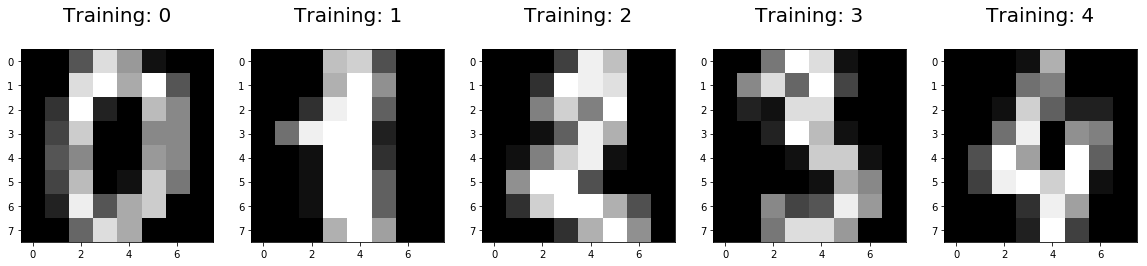

In [63]:
#Use matplotlib to view the images
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(data[0:5], target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

Now let's use a logistic regression algorithm to model this data

In [69]:

#Step 1. train test split with random state = 19 and test size = 0.4

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = .4, random_state = 19)

#Step 2. Fit DecisionTreeClassifier with max_depth 10 on training data

dt = DecisionTreeClassifier(max_depth=10)

dt.fit(X_train, y_train)

#Step 3. Make predictions on the X_test using the model

preds = dt.predict(X_test)

#Step 4. Score predictions
dt.score(X_test, y_test)


0.83727399165507654

Confusion matrix time

In [71]:
#Create confusion matrix from predictions and y_test

cm_digits = pd.DataFrame(confusion_matrix(y_test, preds))

cm_digits

,0,1,2,3,4,5,6,7,8,9
0,59,0,0,0,2,0,0,0,1,0
1,0,57,1,1,4,0,0,0,1,1
2,2,4,65,0,0,0,0,1,6,0
3,0,3,3,56,1,4,0,1,6,2
4,0,5,0,1,55,1,0,2,2,3
5,0,0,0,1,0,67,1,0,2,2
6,0,2,0,0,4,2,67,0,0,0
7,1,1,2,0,3,3,1,62,0,2
8,1,4,4,3,0,4,0,0,52,0
9,1,3,1,3,2,3,0,2,1,62


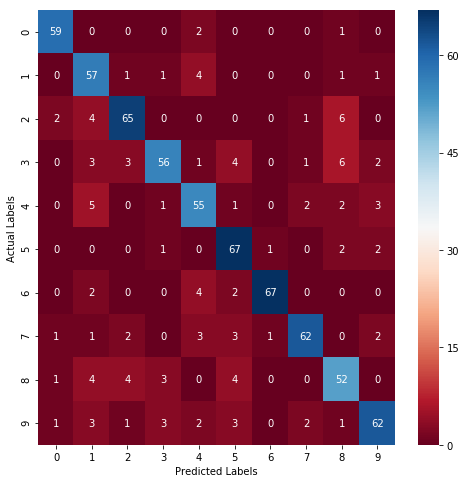

In [72]:
#Heatmap version

plt.figure(figsize=(8, 8))
sb.heatmap(cm_digits, annot=True, cmap= "RdBu")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels");

What does this tell us?

Get the real MNIST dataset

In [ ]:
# from sklearn.datasets import fetch_mldata
# mnist = fetch_mldata('MNIST original')

In [ ]:
#it's a big dataset and will take a while to download..

Let's see some of the images we got wrong.

In [81]:
#Identify indices of wrong predictions
index = 0
false_index = []

In [82]:
#Iterate to find indices of bad predictions
false_preds = y_test != preds

for i, e in enumerate(false_preds):
    if e: 
        false_index.append(i)

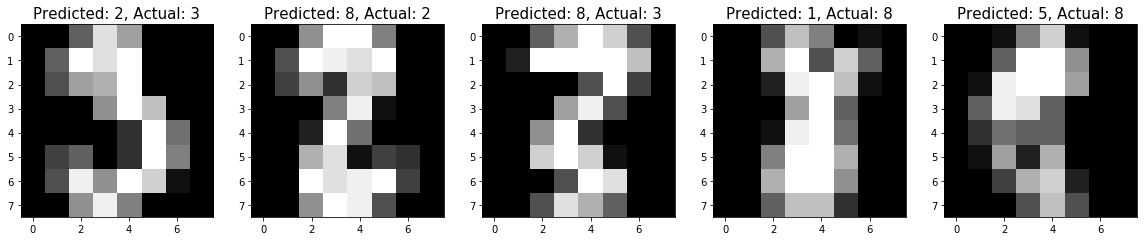

In [83]:
#Plot five incorrectly classified numbers
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(false_index[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test[badIndex], (8,8)), cmap=plt.cm.gray)
    plt.title("Predicted: {}, Actual: {}".format(preds[badIndex], y_test[badIndex]), fontsize = 15)

Class exercise time: 

Which digit did our model do the best at identifying? What digit was the worst?

In [84]:
#Accuracy score answer 

digit_accuracy_dict = {}

observations_number = y_test.shape[0]

for i in range(10):
    tp = cm_digits.iloc[i, i]
    tn = cm_digits.drop(i).drop(i, axis = 1).sum().sum()
    indices = [ind for ind in range(10) if ind != i]
    fp = cm_digits.iloc[indices, i].sum()
    fn = cm_digits.iloc[i, indices].sum()
    acc_score = (tp + tn)/float(tp + tn + fp + fn)
    digit_accuracy_dict[str(i)] = acc_score
    
sorted(digit_accuracy_dict.items(), key= lambda x:x[1], reverse = True)

[('0', 0.9888734353268428),
 ('6', 0.98609179415855353),
 ('7', 0.97357440890125169),
 ('5', 0.96801112656467314),
 ('2', 0.9666203059805285),
 ('9', 0.96383866481223923),
 ('3', 0.95966620305980532),
 ('1', 0.95827538247566069),
 ('4', 0.95827538247566069),
 ('8', 0.95132127955493739)]

In [85]:
#Precision score answer 

digit_precision_dict = {}

for i in range(10):
    tp = cm_digits.iloc[i, i]
    indices = [ind for ind in range(10) if ind != i]
    fp = cm_digits.iloc[indices, i].sum()
    prec_score = (tp)/float(tp + fp)
    digit_precision_dict[str(i)] = prec_score
    
sorted(digit_precision_dict.items(), key= lambda x:x[1], reverse = True)

[('6', 0.97101449275362317),
 ('0', 0.921875),
 ('7', 0.91176470588235292),
 ('3', 0.86153846153846159),
 ('9', 0.86111111111111116),
 ('2', 0.85526315789473684),
 ('5', 0.79761904761904767),
 ('4', 0.77464788732394363),
 ('8', 0.73239436619718312),
 ('1', 0.72151898734177211)]

In [87]:
#Recall score answer 

digit_recall_dict = {}

for i in range(10):
    tp = cm_digits.iloc[i, i]
    indices = [ind for ind in range(10) if ind != i]
    fn = cm_digits.iloc[i, indices].sum()
    recall = (tp)/float(tp + fn)
    digit_recall_dict[str(i)] = recall
    
sorted(digit_recall_dict.items(), key= lambda x:x[1], reverse = True)

[('0', 0.95161290322580649),
 ('5', 0.9178082191780822),
 ('6', 0.89333333333333331),
 ('1', 0.87692307692307692),
 ('2', 0.83333333333333337),
 ('7', 0.82666666666666666),
 ('4', 0.79710144927536231),
 ('9', 0.79487179487179482),
 ('8', 0.76470588235294112),
 ('3', 0.73684210526315785)]

In [ ]:
#there's another angle to interpret this data when we incorporate different metrics.


## Imbalanced Class Machine Learning

As if often the case in real-world machine learning, there is a huge imbalance between the distribution of class of the variable we're trying to predicting.

Class False: 98.23%

Class True: 1.77%

Illustrated example
![www](http://www.svds.com/wp-content/uploads/2016/08/messy.png)

The main problem that imbalanced machine learning project present that is they render the accuracy score metric almost irrelevant.

If our null accuracy is 99.5%, then we don't have much room for improvement. Which is why we need to rely on metrics such as precision and recall.

<br>

Recall aka sensitivity aka the True Positive Rate: The number of correct positive predictions divided by number of positive instances. 

Recall = TP/(TP + FN)

<br>

Precision: The number of correct positive predictions divided by number of positive predictions. 

Precision = TP/(TP+ FP)

<br>

Imagine a confusion with 1000 TNs, 20 FPs, 15 FNs, and 25 TPs. What would the accuracy, precision, and recall scores be?

In [74]:
#Assign variables

tn = 1000.
fp = 20.
fn = 15.
tp = 25.

In [75]:
#Accuracy score

(tn + tp)/(tn + tp + fn + fp)

0.9669811320754716

Pretty good score! Or is it???

In [76]:
#Whats the null accuracy

(tn + fp)/(tn + fp + fn + tp)

0.9622641509433962

We hardly beat the null accuracy. Now let's calculate precision and recall

In [77]:
#Precision

(tp)/(tp + fp)

0.5555555555555556

In [78]:
#Recall
tp/(tp + fn)

0.625

Do we have a good model or not?

In [ ]:
#Here is where the problem lies.. we have a really low precision score. It is NOT A GOOD MODEL!

Let's move onto the real thing by modeling credit card fraud data

https://www.kaggle.com/dalpozz/creditcardfraud

In [3]:
path = "../data/fraud.csv"
#Read data into notebook
fraud = pd.read_csv(path, index_col=[0])

#Drop the Time column
fraud.drop("Time", axis = 1, inplace = True)
fraud.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
12,1.249999,-1.221637,0.383930,-1.234899,-1.485419,-0.753230,-0.689405,-0.227487,-2.094011,1.323729,...,-0.231809,-0.483285,0.084668,0.392831,0.161135,-0.354990,0.026416,0.042422,121.50,0
15,-0.752417,0.345485,2.057323,-1.468643,-1.158394,-0.077850,-0.608581,0.003603,-0.436167,0.747731,...,0.499625,1.353650,-0.256573,-0.065084,-0.039124,-0.087086,-0.180998,0.129394,15.99,0
16,1.103215,-0.040296,1.267332,1.289091,-0.735997,0.288069,-0.586057,0.189380,0.782333,-0.267975,...,-0.024612,0.196002,0.013802,0.103758,0.364298,-0.382261,0.092809,0.037051,12.99,0
21,0.962496,0.328461,-0.171479,2.109204,1.129566,1.696038,0.107712,0.521502,-1.191311,0.724396,...,0.143997,0.402492,-0.048508,-1.371866,0.390814,0.199964,0.016371,-0.014605,34.09,0


The V features are principal components which we'll learn about next Thursday, in the meantime think of them as hidden features.

In [ ]:
#PCA instead of credit card data, such as credit score, occupation etc..

In [ ]:
#consider these as mystery features for now! until next Thursdays' class.

Let'see how imbalanced the classes are

In [92]:
#Value counts without normalize
fraud.Class.value_counts()

0    64315
1      492
Name: Class, dtype: int64

In [93]:
#Value counts with normalize. Null Accuracy:
fraud.Class.value_counts(normalize= True)

0    0.992408
1    0.007592
Name: Class, dtype: float64

In [ ]:
#pretty imbalanced so far..

That is pretty imbalanced would you say?

In [84]:
#Quick EDA to find relationship amount and fraud status

fraud.groupby("Class").mean()["Amount"]

Class
0     89.589643
1    122.211321
Name: Amount, dtype: float64

In [ ]:
#higher transactions does not really mean it will be fraudulant...

What does this say about the relationship between amount of the transaction and fraudelent status?

In [ ]:
#false positive is not as bad, because it's basically a false alarm for Fraud

In [ ]:
#it's worse if you let the Fraudster in, and did not flag the account! This is False Negative, which is Type II Error

Before we get into modeling, what metric should we try to minimize False Negatives or False Positives? Why?

Let's do some modeling.

Train a logistic regression model and evaluate it on the testing dataset using accuracy, recall, and precision scores

In [4]:
#Assign variables, drop and assign target variable.

X = fraud.drop("Class", axis = 1)

y = fraud.Class

In [5]:
#Make a train test split with random state = 25 and test size = 0.4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .4, random_state = 25)

In [6]:
#Fit logistic regression model on training data

lr = LogisticRegression(random_state= 36)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=36, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [7]:
#Null accuracy of testing data

y.value_counts(normalize= True).max()

0.99240822750628788

In [8]:
#Evaluate it on testing set using accuracy score

preds = lr.predict(X_test)
accuracy_score(y_test, preds)

#is it really this small? 50-100 transactions where we will flag, that aren't fraud.

0.99818693824017279

In [9]:
#Evaluate it on testing set using precision score
precision_score(y_test, preds)
# involves FP.. we flagged accounts that don't actually have Fraud activity

0.94117647058823528

In [10]:
#Evaluate it on testing set using recall score. THIS IS THE ONE WE WANT!!! The real value you want to present

recall_score(y_test, preds)

#we're only catching 80% of ALL of the Fraud accounts. 1/5 Fraud activities are passing the system!!!

0.79120879120879117

In [11]:
#Confusion matrix

cm = confusion_matrix(y_test, preds)
cm = pd.DataFrame(cm)
cm

,0,1
0,25732,9
1,38,144


What do these metrics tell us about our dataset?

In [ ]:
#we would rather have less in type II errors...

Cross validation time

In [12]:
#Cross validate using precision score

cross_val_score(LogisticRegression(), X, y, cv = 5, scoring="precision").mean()

0.94568118156353465

In [13]:
#Cross validate using recall score. We're missing almost 25% of the Fraudsters!

cross_val_score(LogisticRegression(), X, y, cv = 5, scoring="recall").mean()

0.76398680684394971

In [14]:
#Cross validate using roc_auc score

cross_val_score(LogisticRegression(), X, y, cv = 5, scoring = "roc_auc").mean()

0.97470322682725907

Make a roc curve

In [15]:
#Derive probabilities of class 1 from the test set. Sliced!
test_probs = lr.predict_proba(X_test)[:, 1]
#Pass in the test_probs variable and the true test labels aka y_test in the roc_curve function
fpr, tpr, thres = roc_curve(y_test, test_probs)
#Outputs the fpr, tpr, for varying thresholds

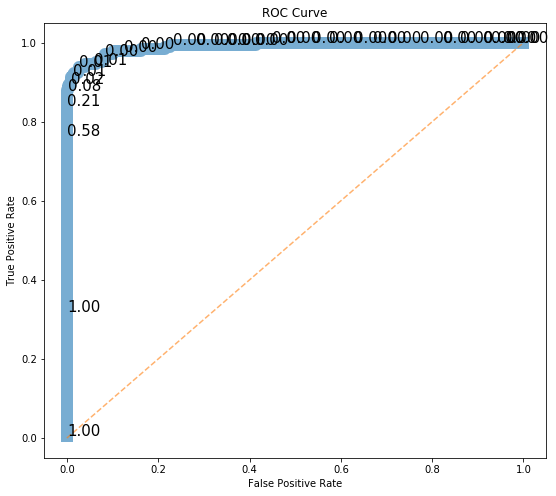

In [16]:
#Plot ROC_curve again but this time annotate the curve with the threshold value
plt.figure(figsize=(9, 8))
plt.plot(fpr, tpr, linewidth=12, alpha = .6)
plt.plot([0,1], [0,1], "--", alpha=.6)
for label, x, y in zip(thres[::10], fpr[::10], tpr[::10]):
    plt.annotate("{0:.2f}".format(label), xy=(x, y ), size = 15)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

How do you interpret this chart?

In [ ]:
# we are getting the vast majority of it correct, but we want to minimize the FN rates.. 

In [ ]:
# probability threshold should be .01 

### Imbalanced class techniques

![eop](https://chrisalbon.com/machine-learning/handling_imbalanced_classes_with_downsampling/Downsampling_print.png)
Source: Chris Albon

In [ ]:
# It'll be 50 / 50

Let's go ahead apply down sampling to our training dataset

In [107]:
#How many true class are there in the training dataset?

fraud.Class.value_counts()

0    64315
1      492
Name: Class, dtype: int64

In [108]:
#Assign number of fraud class in training data to variable
N = fraud.Class.value_counts()[: 1]
N

0    64315
Name: Class, dtype: int64

In [113]:
from sklearn.utils import resample

In [141]:
#Import resample function from sklearn
from sklearn.utils import resample

fraud_maj = fraud[fraud.Class==0]
fraud_min = fraud[fraud.Class==1]
 
# Downsample majority class
fraud_majority_downsampled = resample(fraud_maj, 
                                 replace= False,     # Do not sample with replacement
                                 n_samples=N,    # to match minority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
fraud_ds = pd.concat([fraud_majority_downsampled, fraud_min])


# Display new class counts
fraud_ds.Class.value_counts()

0    38588
1      492
Name: Class, dtype: int64

Perfectly balanced classes. Let's use cross validate to see how well our model does.

Use accuracy, recall, precision, and roc_auc metrics

In [ ]:
X_ds = fraud_ds.drop("Class", axis = 1)
y_ds = fraud_ds.Class

#Accuracy score


In [ ]:
#Precision



In [ ]:
#Recall


In [ ]:
#Roc Auc


What does this tell us about our model and our data?

In [ ]:
#now it's only missing 11% of the FRAUDSTERS

![aw](https://chrisalbon.com/machine-learning/handling_imbalanced_classes_with_upsampling/Upsampling_print.png)

In [115]:

#Number non fraud observations
N = fraud.Class.value_counts()[0]

# Downsample majority class
fraud_minority_upsampled = resample(fraud_min, 
                                 replace=True,   # Do sample with replacement!!! Not putting marbles back in the bag
                                 n_samples=N,    # to match minority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
fraud_us = pd.concat([fraud_minority_upsampled, fraud_maj])
 
# Display new class counts
fraud_us.Class.value_counts()

1    64315
0    64315
Name: Class, dtype: int64

Cross validation again

In [116]:
#Assign X and y
X_us = fraud_us.drop("Class", axis = 1)
y_us = fraud_us.Class

#Accuracy score
cross_val_score(LogisticRegression(), X_us, y_us, cv = 5, scoring="accuracy").mean()
#when both classes are weighted equally, they are read a lot better..

0.94648215812796388

In [117]:
#Precision score
cross_val_score(LogisticRegression(), X_us, y_us, cv = 5, scoring="precision").mean()
#this has also gone up!

0.97014579015773439

In [118]:
#Recall
cross_val_score(LogisticRegression(), X_us, y_us, cv = 5, scoring="recall").mean()
#Upsampling is better than DownSampling. So it's better to train a dataset with upsampling data before uploading into 
#production! This is the number you want to put in your PRESENTATiON!

0.92141802067946832

In [119]:
#Roc auc score
cross_val_score(LogisticRegression(), X_us, y_us, cv = 5, scoring="roc_auc").mean()

0.98531850697507584

With both techniques, our interpretation of the accuracy score is more meaningful.

![wee](https://svds.com/wp-content/uploads/2016/08/ImbalancedClasses_fig5.jpg)

In [ ]:
#Up sampling = Expanding the smaller

In [ ]:
#Under sampling = compressing the majority

However, there is an issue here and that is can a model trained on balanced data work well with imbalanced data? Let's find out!


We're going to train a logistic regression model on a downsampled training dataset and then apply it to an imbalanced testing dataset.

In [ ]:
#can we train a model to handle imbalanced data?

In [120]:
#reassign variables

X = fraud.drop("Class", axis = 1)

y = fraud.Class

In [121]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.4, 
                                                    random_state = 23)

In [115]:
X_train.shape

(38884, 29)

Downsample data

In [116]:
#Combine the two training datasets
train = X_train.copy()
train["Class"] = y_train

In [118]:
#Class count
train.Class.value_counts()

0    38574
1      310
Name: Class, dtype: int64

In [120]:
from sklearn.utils import resample
#using the same technique for the Downsampling...

N = train.Class.value_counts()[1]

fraud_maj = train[train.Class==0]
fraud_min = train[train.Class==1]
 
# Downsample majority class
fraud_majority_downsampled = resample(fraud_maj, 
                                 replace=False,     # Do not sample with replacement
                                 n_samples=N,    # to match minority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
fraud_ds = pd.concat([fraud_majority_downsampled, fraud_min])
 
# Display new class counts
fraud_ds.Class.value_counts()

1    310
0    310
Name: Class, dtype: int64


Train Logistic Regression on downsampled data and evaluate it on testing data

In [121]:
#Assign X and y
fraud_ds_X = fraud_ds.drop("Class", axis = 1)
fraud_ds_y = fraud_ds.Class
#Intialize

lr = LogisticRegression()
lr.fit(fraud_ds_X, fraud_ds_y)
#training the data on balanced data!

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [122]:
#Null accuracy . We will have to beat this!

y_test.value_counts(normalize= True)

0    0.992979
1    0.007021
Name: Class, dtype: float64

In [123]:
#Evaluate on testing dataset

preds = lr.predict(X_test)

accuracy_score(y_test, preds)
#95% vs. 99%
# Lower than the Null Accuracy.. Maybe this is not the magic technique... This is not always perfect.

0.96593758438452337

In [130]:
#precision

precision_score(y_test, preds)

#we're getting a lot of FP's.... "we get a lot of complaints.. people of dropping accounts.."

0.13414634146341464

In [131]:
#recall

recall_score(y_test, preds)

#not as bad.. 

0.89795918367346939

In [124]:
#Confusion matrix

confusion_matrix(y_test, preds)

#we're flagging a lot of accounts that aren't fraud.. 
#is it more important to minimize FN? We did that here...

array([[24872,   869],
       [   14,   168]])

What's your interpretation now?

<br>
Let's try the upsampling technique to see if that produces a better model.

In [125]:
N = train.Class.value_counts()[0]

fraud_maj = train[train.Class==0]
fraud_min = train[train.Class==1]
 
# Downsample majority class
fraud_minority_upsampled = resample(fraud_min, 
                                 replace=True,     # Do not sample with replacement
                                 n_samples=N,    # to match minority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
fraud_us = pd.concat([fraud_minority_upsampled, fraud_maj])
 
# Display new class counts
fraud_us.Class.value_counts()

1    38574
0    38574
Name: Class, dtype: int64

In [126]:
#Assign X and y
fraud_us_X = fraud_us.drop("Class", axis = 1)
fraud_us_y = fraud_us.Class
#Intialize

lr = LogisticRegression()
lr.fit(fraud_us_X, fraud_us_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [127]:
#Evaluate on testing dataset

preds = lr.predict(X_test)

accuracy_score(y_test, preds)

0.97477143849091541

In [128]:
#precision

precision_score(y_test, preds)

0.20864197530864198

In [129]:
#recall

recall_score(y_test, preds)

0.9285714285714286

In [130]:
#Confusion matrix

confusion_matrix(y_test, preds)

array([[25100,   641],
       [   13,   169]])

What do we make of these results??

Here's the good news. We can set a class_weight setting in our models to be assigned to "balanced".

From sklearn:

"The 'balanced' mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))."



We'll cross validate with Logistic Regression, Decision Trees, and RandomForest models with the class_weight parameter set to "balanced."

But first let's calculate those weights

In [133]:
y.value_counts()

0    64315
1      492
Name: Class, dtype: int64

In [136]:
64315/(2*64315.)

0.5

In [131]:
#Class 0 weight
(y.shape[0])/float((2*y.value_counts()[0]))

0.5038249242011972

In [132]:
#Class 1 weight
(y.shape[0])/float((2*y.value_counts()[1]))

65.86077235772358

In [138]:
64315/(2*492.0)

65.36077235772358

In [139]:
#Logistic regression 

cross_val_score(LogisticRegression(class_weight="balanced"), 
                X, y, cv = 5, scoring="accuracy").mean()

0.97318169003824662

In [140]:
#Decision Tree with max depth = 12

cross_val_score(DecisionTreeClassifier(class_weight="balanced", max_depth=14), 
                X, y, cv = 5, scoring="accuracy").mean()

0.99463021064427648

In [141]:
#Random Forest with n_estimators = 40

cross_val_score(RandomForestClassifier(class_weight="balanced", n_estimators=40), 
                X, y, cv = 5, scoring="accuracy").mean()

0.99790144768751321

# Resources

MNIST:

- https://github.com/grfiv/MNIST/blob/master/knn/knn.ipynb
- https://github.com/monsta-hd/ml-mnist
- https://www.youtube.com/watch?v=aZsZrkIgan0
- http://joshmontague.com/posts/2016/mnist-scikit-learn/

Multi-class:

- https://gallery.cortanaintelligence.com/Competition/Tutorial-Competition-Iris-Multiclass-Classification-2
-https://www.youtube.com/watch?v=6kzvrq-MIO0


Imbalanced classes:

- https://towardsdatascience.com/what-metrics-should-we-use-on-imbalanced-data-set-precision-recall-roc-e2e79252aeba
- https://svds.com/learning-imbalanced-classes/
- https://www.youtube.com/watch?v=X9MZtvvQDR4
- https://elitedatascience.com/imbalanced-classes
- https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/



# Class work

If we have enough time for class work, I want to use optimize RandomForest and AdaBoost models fit on the fraud and mnist datasets. Use GridSearch!